In [5]:
# SyedHusainAhmed
import pandas as pd
stock_data = pd.read_csv(r"D:\\Data Science\\Internship Ecodecamp\\nflx_stock_data.csv")
stock_data.head()

,Date,NFLX.Open,NFLX.High,NFLX.Low,NFLX.Close,NFLX.Volume,NFLX.Adjusted
0,2019-03-04,359.720001,362.250000,348.040009,351.040009,7487000,351.040009
1,2019-03-05,351.459991,356.170013,348.250000,354.299988,5937800,354.299988
2,2019-03-06,353.600006,359.880005,351.700012,359.609985,6211900,359.609985
3,2019-03-07,360.160004,362.859985,350.500000,352.600006,6151300,352.600006
4,2019-03-08,345.750000,349.920013,342.470001,349.600006,6898800,349.600006


In [9]:
# Inspect the DataFrame to see its structure
print(stock_data.columns)  # This will show all column names
print(stock_data.head())    # This will show the first few rows of the DataFrame

Index(['Date', 'NFLX.Open', 'NFLX.High', 'NFLX.Low', 'NFLX.Close',
       'NFLX.Volume', 'NFLX.Adjusted'],
      dtype='object')
         Date   NFLX.Open   NFLX.High    NFLX.Low  NFLX.Close  NFLX.Volume  \
0  2019-03-04  359.720001  362.250000  348.040009  351.040009      7487000   
1  2019-03-05  351.459991  356.170013  348.250000  354.299988      5937800   
2  2019-03-06  353.600006  359.880005  351.700012  359.609985      6211900   
3  2019-03-07  360.160004  362.859985  350.500000  352.600006      6151300   
4  2019-03-08  345.750000  349.920013  342.470001  349.600006      6898800   

   NFLX.Adjusted  
0     351.040009  
1     354.299988  
2     359.609985  
3     352.600006  
4     349.600006  


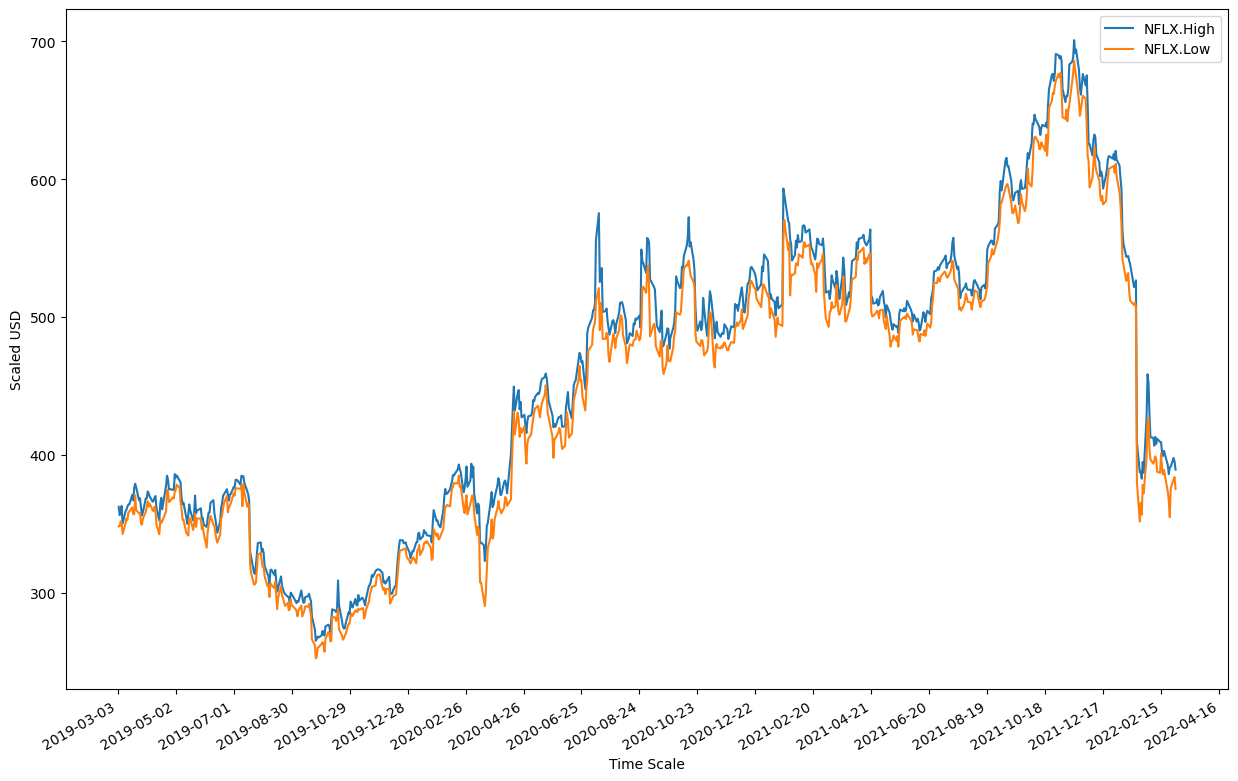

In [35]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Assuming the date is in a different column or the index
if isinstance(stock_data.index, pd.DatetimeIndex):
    x_dates = stock_data.index  # Use the index if it's already a DatetimeIndex
else:
    # If there's a column that contains the date, identify it
    date_column = None
    for col in stock_data.columns:
        # Check if the column can be converted to datetime
        try:
            pd.to_datetime(stock_data[col])
            date_column = col
            break
        except Exception:
            continue

    if date_column is not None:
        stock_data[date_column] = pd.to_datetime(stock_data[date_column])
        stock_data.set_index(date_column, inplace=True)
        x_dates = stock_data.index
    else:
        raise KeyError("No suitable date column found in the DataFrame.")

# Check if 'High' and 'Low' columns exist
if 'NFLX.High' not in stock_data.columns or 'NFLX.Low' not in stock_data.columns:
    raise KeyError("The DataFrame must contain 'NFLX.High' and 'NFLX.Low' columns.")

# Now plot the data
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))

# Plot 'High' and 'Low' values
plt.plot(x_dates, stock_data['NFLX.High'], label='NFLX.High')
plt.plot(x_dates, stock_data['NFLX.Low'], label='NFLX.Low')

plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [12]:
target_y = stock_data['NFLX.Close']
X_feat = stock_data.iloc[:,0:3]

In [16]:
#Feature Scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                    data=X_ft,
                    index=X_feat.index)

In [20]:
# Example data (make sure to replace this with your actual data)
data = np.random.rand(100, 5)  # Assuming 100 samples and 5 features

def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps + 1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps - 1, -1])
    return np.array(X), np.array(y)

# Specify the number of time steps
n_steps = 10

# Call the function with the defined data
X, y = lstm_split(data, n_steps)

In [25]:
#Train and Test Sets for Stock Price Prediction Project
X1, y1 = lstm_split(stock_data.values, n_steps=2)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data.index

X_train, X_test = X1[:split_idx], X1 [split_idx:]
y_train, y_test = y1[:split_idx], y1 [split_idx:]
X_train_date, X_test_date = date_index[: split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(756, 2, 5) (605, 2, 5) (151, 2, 5) (151,)


In [30]:
#Stock Prediction Machine Learning Project- Building the LSTM model

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation ='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 2, 32)               │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#Now we can fit this simple model to the training data.
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
152/152 - 3s - 17ms/step - loss: 18900350976.0000
Epoch 2/100
152/152 - 0s - 2ms/step - loss: 6157565.0000
Epoch 3/100
152/152 - 0s - 2ms/step - loss: 99332.1172
Epoch 4/100
152/152 - 0s - 2ms/step - loss: 99312.0547
Epoch 5/100
152/152 - 0s - 2ms/step - loss: 101046.3906
Epoch 6/100
152/152 - 0s - 2ms/step - loss: 104166.4766
Epoch 7/100
152/152 - 0s - 2ms/step - loss: 108669.0078
Epoch 8/100
152/152 - 0s - 2ms/step - loss: 114588.4531
Epoch 9/100
152/152 - 0s - 2ms/step - loss: 121791.8516
Epoch 10/100
152/152 - 0s - 2ms/step - loss: 129799.2344
Epoch 11/100
152/152 - 0s - 2ms/step - loss: 138190.5781
Epoch 12/100
152/152 - 0s - 2ms/step - loss: 147851.2344
Epoch 13/100
152/152 - 0s - 2ms/step - loss: 160261.7031
Epoch 14/100
152/152 - 0s - 2ms/step - loss: 173295.7344
Epoch 15/100
152/152 - 0s - 2ms/step - loss: 180019.3594
Epoch 16/100
152/152 - 0s - 2ms/step - loss: 176793.9531
Epoch 17/100
152/152 - 0s - 2ms/step - loss: 170584.7656
Epoch 18/100
152/152 - 0s - 2ms/ste

In [34]:
#Performance Evaluation on Test Set
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [42]:
# Example predictions and true values
# Assuming y_test is 1D and y_pred is 3D
# Replace these with your actual data
y_test = np.random.rand(100)  # 1D array of true values
y_pred = np.random.rand(100, 1, 1)  # 3D array of predicted values

# Reshape y_pred to 1D
y_pred_flat = y_pred.reshape(-1)  # Flattening to 1D

# Calculate RMSE and MAPE
rmse = mean_squared_error(y_test, y_pred_flat, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_flat)

print("RMSE: ", rmse)
print("MAPE: ", mape)

RMSE:  0.4365586809020269
MAPE:  5.511396659326657


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
#to get better results with the same dataset but a deeper LSTM model.

lstm = Sequential()
lstm.add(LSTM (50, input_shape=(X_train.shape[1], X_train.shape[2]),
               activation='relu', return_sequences=True))
lstm.add(LSTM (50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 2, 50)               │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

y_pred shape: (100, 1, 1)
y_test shape: (100,)


In [47]:
y_pred = y_pred.reshape(y_pred.shape[0], -1)  # Flatten the last two dimensions if appropriate
# OR
y_pred = y_pred.squeeze()  # Removes single-dimensional entries

In [48]:
#the RMSE and MAPE values are better too
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAPE:", mape)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ",rmse)
print("MAPE: ", mape)

RMSE: 0.4365586809020269
MAPE: 5.511396659326657
RSME:  0.4365586809020269
MAPE:  5.511396659326657


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
n_steps-10
X1, y1 = lstm_split(stock_data.values, n_steps=n_steps)
train_split-0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stock_data.index

X_train, X_test = X1[:split_idx], X1 [split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
x_train_date, x_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(748, 10, 5) (599, 10, 5) (149, 10, 5) (152,) (149,)
